In [5]:
import pandas
import os
import matplotlib.pyplot
import numpy

In [6]:
def load_rounds():
    def read(df: pandas.DataFrame) -> dict:
        objects = {}
        for idx, row in df.iterrows():
            objects[row['ID'].split('-')[0]] = {
                metric: row[metric]
                for metric in ['arrival_rate_mean', 'departure_rate_mean', 'speed_mean', 'accumulated_waiting_time_mean', 'waiting_time_mean']
            }
        return objects

    def arrange(rounds: list[dict]):
        objects: dict = {}
        for round in rounds:
            for object_key, object_data in round[0].items():
                if object_key not in objects:
                    objects[object_key] = {}
                objects[object_key] = {
                    metric: (objects[object_key].get(metric) or []) + [value]
                    for metric, value in object_data.items()
                }
        return objects
    
    def fetch():
        rounds = []
        for file in os.listdir('rounds'):
            path = os.path.join('rounds', file)
            id = int(file.split('.')[0])
            round = read(pandas.read_csv(path))
            rounds.append((round, id))
        rounds = sorted(rounds, key = lambda k: k[1])
        return arrange(rounds)

    return fetch()
rounds = load_rounds()
rounds

{'dqn': {'arrival_rate_mean': [0.0024626231311565,
   1.2722511125556275,
   1.2387744387219362,
   0.5726661333066654,
   0.5726286314315716],
  'departure_rate_mean': [0.0115255762788139,
   1.2739136956847843,
   1.2404370218510925,
   0.5788164408220411,
   0.5787789389469473],
  'speed_mean': [8.43764738346009,
   9.902464225660978,
   9.895634175270562,
   9.26347554731374,
   9.264022856737965],
  'accumulated_waiting_time_mean': [990.769815192223,
   823.3536882567606,
   835.4017649157046,
   967.321459664033,
   967.3382023806424],
  'waiting_time_mean': [49490.15316631152,
   37300.17901586505,
   39500.45951504732,
   48299.8369334856,
   48300.61092524221]},
 'fixed': {'arrival_rate_mean': [1.971223655237496,
   1.5140225667831029,
   1.8786252827343557,
   1.9881586067172536,
   1.8370132073337773],
  'departure_rate_mean': [1.970544196288141,
   1.5154424144950116,
   1.8800201055541597,
   1.9875545824052752,
   1.8384206491825528],
  'speed_mean': [9.792809117657876,
 

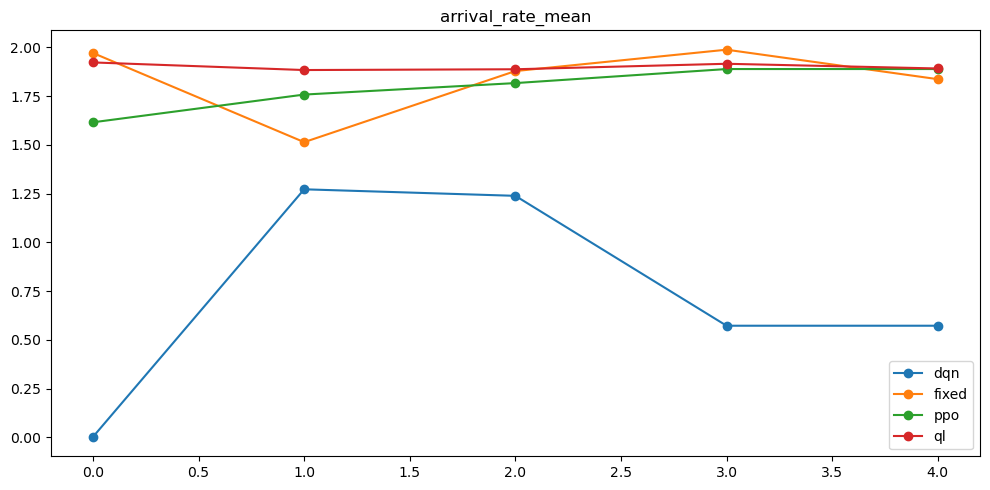

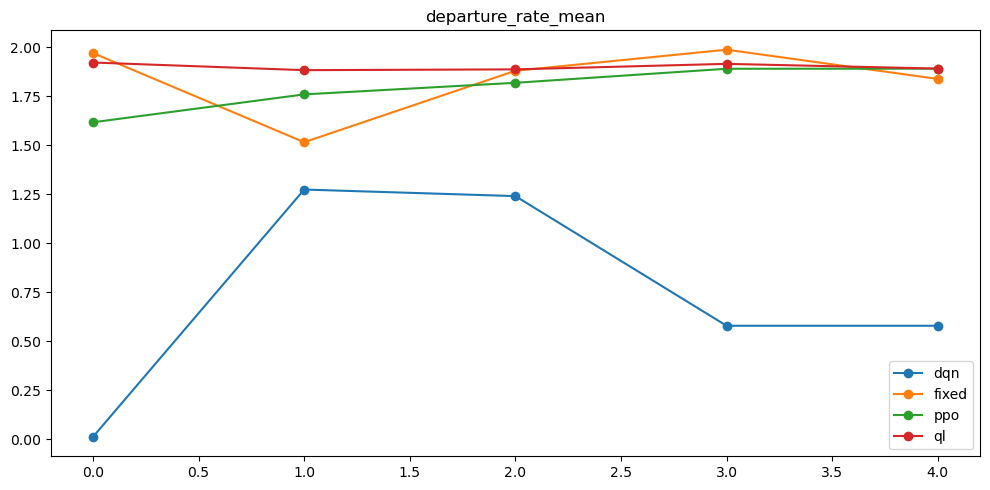

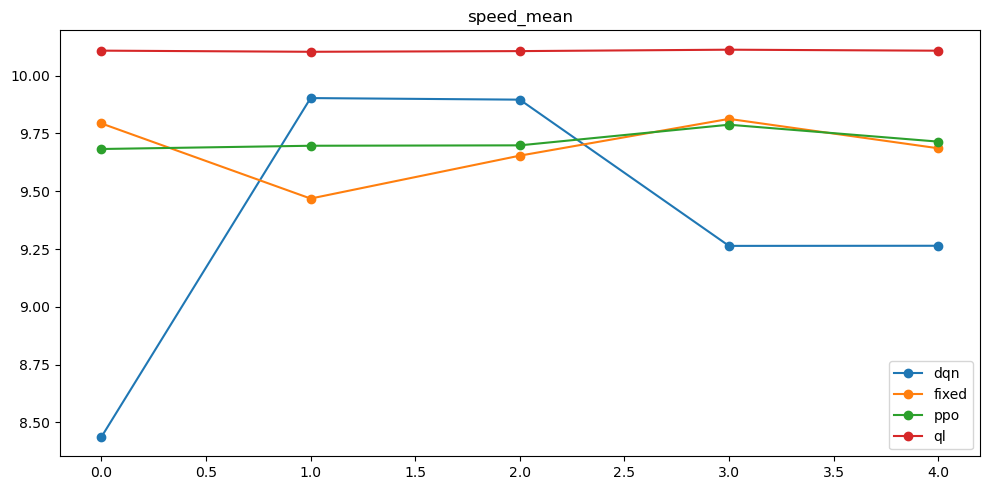

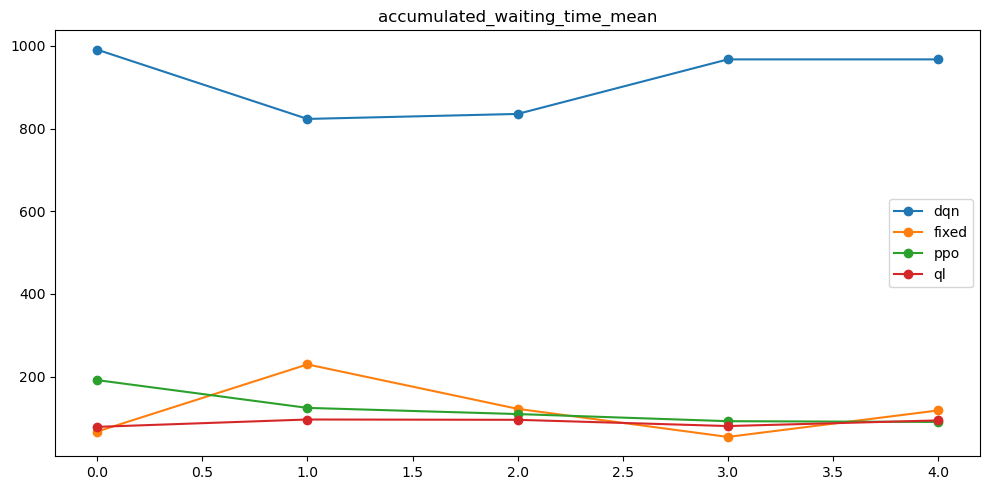

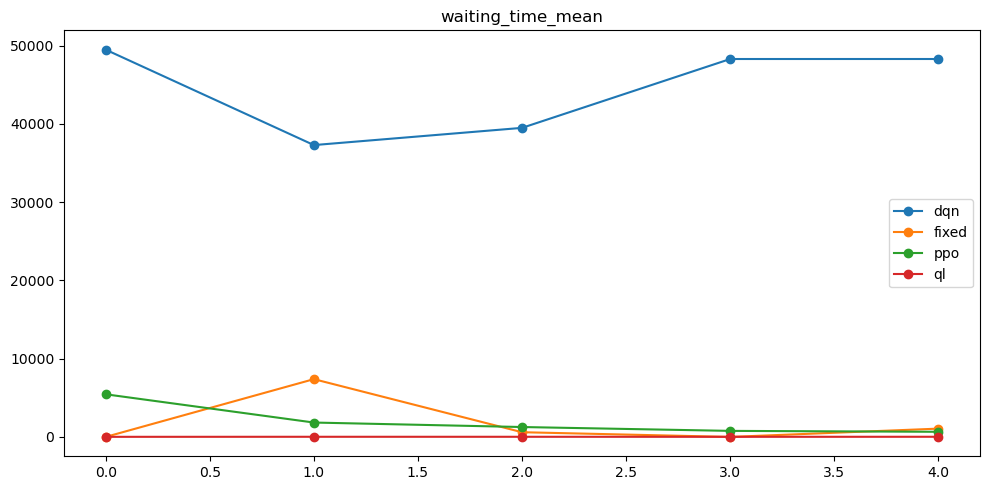

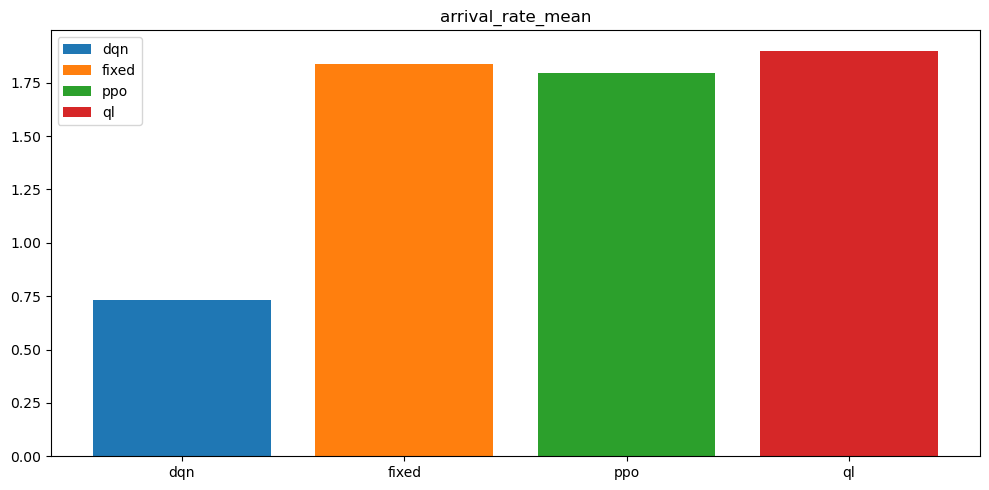

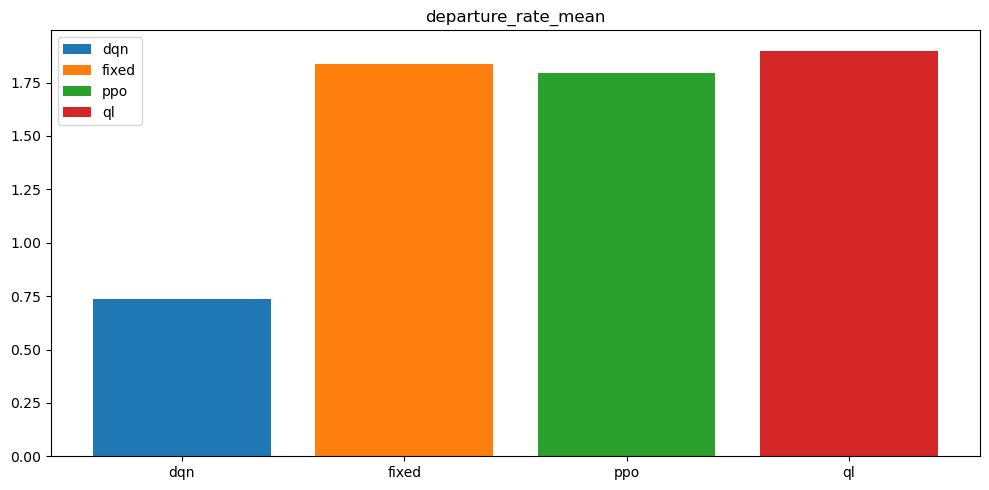

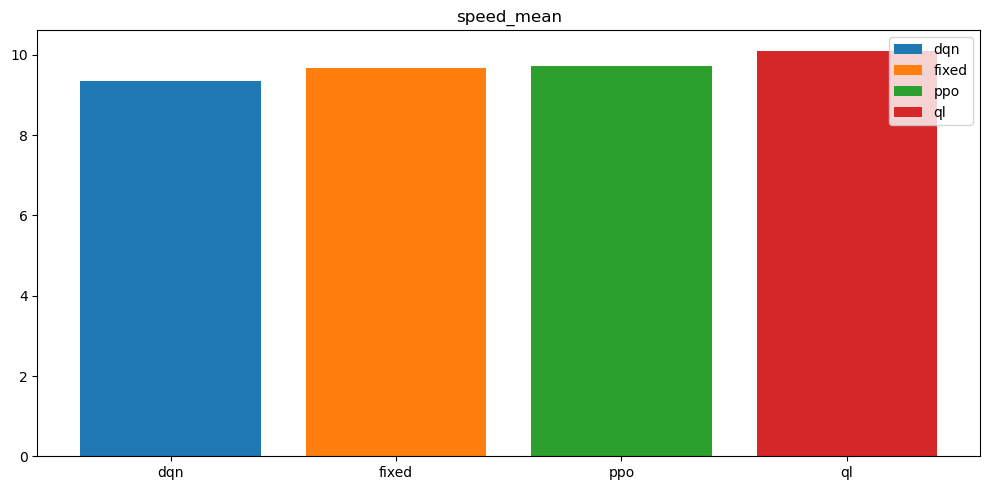

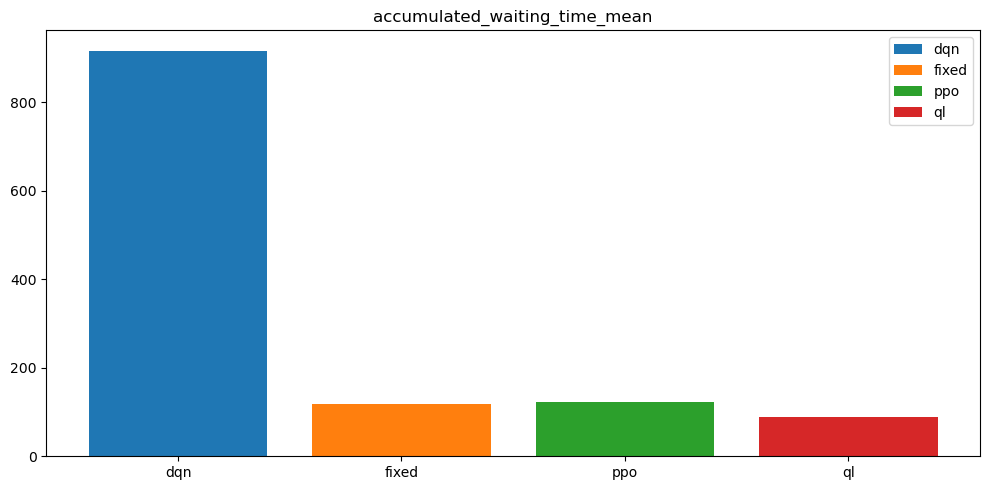

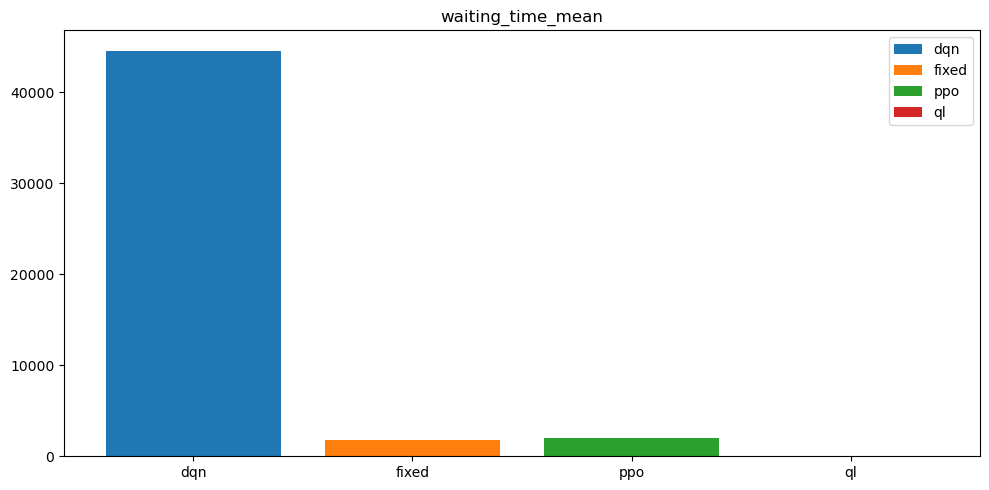

In [7]:
def extract_metric(rounds: dict, metric: str):
    result = {}
    for object_key, object_data in rounds.items():
        result[object_key] = object_data[metric]
    return result

def plot_metrics(rounds: dict, metrics: list[str], mean: bool = False):
    for metric in metrics:
        metric_data = extract_metric(rounds, metric)
        fig = matplotlib.pyplot.figure(figsize=(10, 5))
        for object_key, object_value in metric_data.items():
            Ys = object_value
            Xs = list(range(len(Ys)))
            if mean:
                Ys = [numpy.mean(Ys)] * len(Xs)
                matplotlib.pyplot.plot(Xs, Ys, label=object_key)
            else:
                matplotlib.pyplot.plot(Xs, Ys, label=object_key, marker='o')
        matplotlib.pyplot.title(metric)
        matplotlib.pyplot.legend()
        matplotlib.pyplot.tight_layout()
        matplotlib.pyplot.show()

def bar_metrics(rounds: dict, metrics: list[str]):
    for metric in metrics:
        metric_data = extract_metric(rounds, metric)
        fig = matplotlib.pyplot.figure(figsize=(10, 5))
        for object_key, object_value in metric_data.items():
            matplotlib.pyplot.bar(object_key, numpy.mean(object_value), label=object_key)
        matplotlib.pyplot.title(metric)
        matplotlib.pyplot.legend()
        matplotlib.pyplot.tight_layout()
        matplotlib.pyplot.show()


plot_metrics(rounds, ['arrival_rate_mean', 'departure_rate_mean', 'speed_mean', 'accumulated_waiting_time_mean', 'waiting_time_mean'], mean=False)
bar_metrics(rounds, ['arrival_rate_mean', 'departure_rate_mean', 'speed_mean', 'accumulated_waiting_time_mean', 'waiting_time_mean'])

In [8]:
def fibonacci(nums: int) -> list[int]:
    if nums < 0:
        raise ValueError(nums)
    elif nums == 0:
        return []
    elif nums == 1:
        return [1]
    else:
        arr = [1, 2]
        for i in range(2, nums):
            arr.append(arr[-1] + arr[-2])
        return arr

def assign_points(objects: dict[str, dict], metric: str, higher_is_better: bool = True) -> dict:
    sorted_object_keys: list[str] = []
    if higher_is_better:
        sorted_object_keys = sorted(list(objects.keys()), key = lambda obj: numpy.mean(objects[obj][metric]))
    else:
        sorted_object_keys = sorted(list(objects.keys()), key = lambda obj: -numpy.mean(objects[obj][metric]))
    results = {}
    for idx, obj_points in enumerate(fibonacci(len(sorted_object_keys))):
        results[sorted_object_keys[idx]] = obj_points
    return results

def update_points(consolidated_points: dict, round_points: dict) -> dict:
    results = {}
    for obj_key, obj_points in round_points.items():
        results[obj_key] = (consolidated_points.get(obj_key) or 0) + round_points[obj_key]
    return results

def leaderboard(objects: dict, metrics: list[tuple[str, bool]]) -> dict:
    results = {}
    for (metric, higher_is_better) in metrics:
        round_points = assign_points(objects, metric, higher_is_better)
        print(round_points)
        results = update_points(results, round_points)
    return results

leaderboard(rounds, [
    ('arrival_rate_mean', True),
    ('departure_rate_mean', True),
    ('speed_mean', True),
    ('waiting_time_mean', False),
    ('accumulated_waiting_time_mean', False)
])

{'dqn': 1, 'ppo': 2, 'fixed': 3, 'ql': 5}
{'dqn': 1, 'ppo': 2, 'fixed': 3, 'ql': 5}
{'dqn': 1, 'fixed': 2, 'ppo': 3, 'ql': 5}
{'dqn': 1, 'ppo': 2, 'fixed': 3, 'ql': 5}
{'dqn': 1, 'ppo': 2, 'fixed': 3, 'ql': 5}


{'dqn': 5, 'ppo': 11, 'fixed': 14, 'ql': 25}